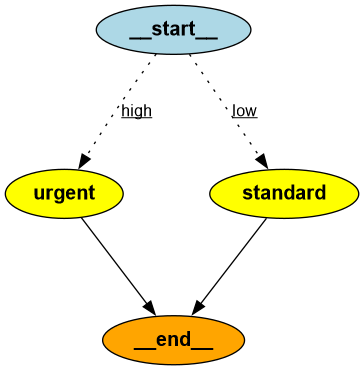

In [14]:
from typing import TypedDict
from langgraph.graph import END, START, StateGraph
from IPython.display import Image, display

# Define the structure of the input state (customer support request)
class SupportRequest(TypedDict):
    message: str
    priority: int  # 1 (high), 2 (medium), 3 (low)


# Function to categorize the support request
def categorize_request(request: SupportRequest):
    print(f"Received request: {request}")
    # TODO: Implement Conditional Routing
    if "urgent" in request['message'].lower() or request['priority'] == 1:
        return "high"
    return "low"


# Function to process high-priority requests
def handle_urgent(request: SupportRequest):
    print(f"Routing to Urgent Support Team: {request}")
    return request


# Function to process standard requests
def handle_standard(request: SupportRequest):
    print(f"Routing to Standard Support Queue: {request}")
    return request


# Create the state graph
graph = StateGraph(SupportRequest)
# TODO: Create the graph
graph.add_node("urgent",handle_urgent)
graph.add_node("standard",handle_standard)

graph.add_conditional_edges(START,categorize_request,{"high":"urgent","low":"standard"})
graph.add_edge("urgent",END)
graph.add_edge("standard",END)

runnable = graph.compile()

## Display graph
try:
    display(Image(runnable.get_graph().draw_png()))
except Exception:
    pass


In [15]:
# Simulate a customer support request
print(runnable.invoke({"message": "My account was hacked! Urgent help needed.", "priority": 1}))

Received request: {'message': 'My account was hacked! Urgent help needed.', 'priority': 1}
Routing to Urgent Support Team: {'message': 'My account was hacked! Urgent help needed.', 'priority': 1}
{'message': 'My account was hacked! Urgent help needed.', 'priority': 1}


In [16]:
print(runnable.invoke({"message": "I need help with password reset.", "priority": 3}))

Received request: {'message': 'I need help with password reset.', 'priority': 3}
Routing to Standard Support Queue: {'message': 'I need help with password reset.', 'priority': 3}
{'message': 'I need help with password reset.', 'priority': 3}


In [17]:
for chunk in runnable.stream({"message": "I need help with password reset.", "priority": 3},stream_mode="debug"):
    print(chunk)

Received request: {'message': 'I need help with password reset.', 'priority': 3}
{'type': 'task', 'timestamp': '2025-06-04T12:09:30.959180+00:00', 'step': 1, 'payload': {'id': 'fb9e07b1-c513-60ba-fdd7-ac0e34bc0b07', 'name': 'standard', 'input': {'message': 'I need help with password reset.', 'priority': 3}, 'triggers': ('branch:to:standard',)}}
Routing to Standard Support Queue: {'message': 'I need help with password reset.', 'priority': 3}
{'type': 'task_result', 'timestamp': '2025-06-04T12:09:30.959180+00:00', 'step': 1, 'payload': {'id': 'fb9e07b1-c513-60ba-fdd7-ac0e34bc0b07', 'name': 'standard', 'error': None, 'result': [('message', 'I need help with password reset.'), ('priority', 3)], 'interrupts': []}}
